# Introduction to Montecarlo Method

------------------------

In [1]:

import random
import matplotlib.pyplot as plt
import numpy as np
import pylab
import seaborn as sns
sns.set()
%matplotlib inline


##### Lets calculate the value of PI directly

3.208


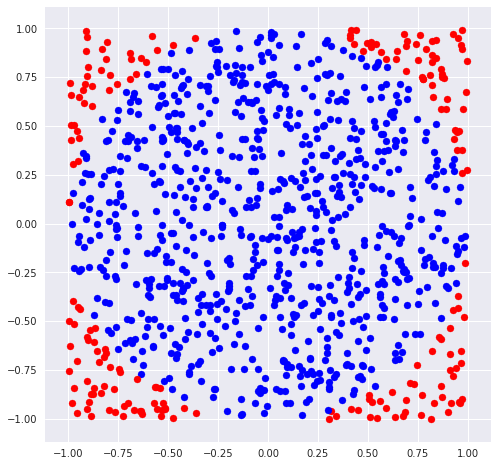

In [8]:
n_trials = 1000
n_hits = 0
plt.figure(figsize = [8,8])
for iter in range(n_trials):
    x = random.uniform(-1.0, 1.0)
    y = random.uniform(-1.0, 1.0)
    if x**2 + y**2 < 1.0: 
        plt.scatter(x,y,color = "blue")
        n_hits += 1
    else:
         plt.scatter(x,y,color = "red")
print(4.0 * n_hits / float(n_trials))
plt.savefig("test.png")

* Lets construct the function to run above code multiple time

In [24]:
def direct_pi(N):
    n_hits = 0
    for i in range(N):
        x = random.uniform(-1.0, 1.0)
        y = random.uniform(-1.0, 1.0)
        if x ** 2 + y ** 2 < 1.0:
            n_hits += 1
    computed_pi = 4.0*n_hits / float(n_trials)        
    return computed_pi

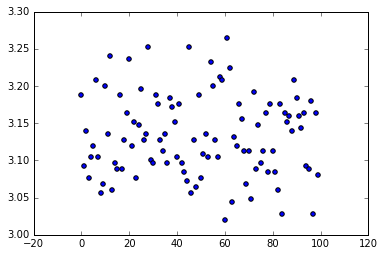

In [25]:
n_runs = 100
n_trials = 1000
for run in range(n_runs):
    pi = direct_pi(n_trials) 
    plt.scatter(run,pi)

#### Marcob chain Calculation of PI

3.0576


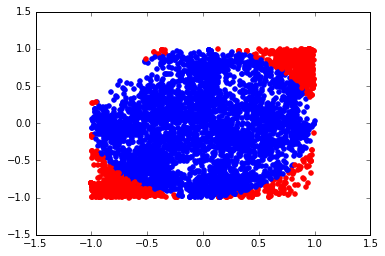

In [35]:
x, y = 1.0, 1.0
delta = 0.1
n_trials = 5000
n_hits = 0
for i in range(n_trials):
    del_x = random.uniform(-delta, delta)
    del_y = random.uniform(-delta, delta)
    
    '''to make sure they are inside square'''
    if (abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0):
        x = x + del_x
        y = y + del_y
        
    '''to make sure they are inside circle'''
    if x**2 + y**2 < 1.0:
        n_hits += 1  
        plt.scatter(x,y,color = "blue")
    else:
        plt.scatter(x,y,color = "red")
        
print 4.0 * n_hits / float(n_trials)

* Lets construct the function to run above code multiple time.

In [31]:
def markov_pi(N, delta): 
    x, y = 1.0, 1.0
    n_hits = 0
    for i in range(N):
        del_x, del_y = random.uniform(-delta, delta), random.uniform(-delta, delta)
        if abs(x + del_x) < 1.0 and abs(y + del_y) < 1.0:
            x, y = x + del_x, y + del_y
        if x**2 + y**2 < 1.0: n_hits += 1
        computed_pi = 4.0 * n_hits / float(n_trials)    
    return computed_pi

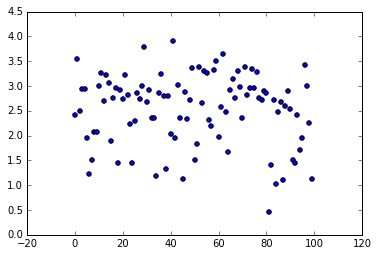

In [34]:
n_runs = 100
n_trials = 400
delta = 0.1
for run in range(n_runs):
    pi =  markov_pi(n_trials, delta)
    plt.scatter(run,pi)

-----------------------

## Pebble Game

----------------------------------

In [ ]:
Lets Construct Pebble Story

In [36]:

neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
t_max = 4
site = 8
t = 0
print site
while t < t_max:
    t += 1
    site = neighbor[site][random.randint(0, 3)]
    print site


8
8
5
2
2


Histogram with weight

In [65]:
neighbor_o =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]

In [66]:
histo = [0, 0, 0, 0, 0, 0, 0, 0, 0]
weight = [3.0, 0.5, 1.0, 0.5, 1.0, 0.5, 2.0, 0.5, 1.0]
pos = 8
n_iter = 10000
for iter in range(n_iter):
    new_pos = neighbor_o[pos][random.randint(0, 3)]
    if random.random() < weight[new_pos] / weight[pos]:
        pos = new_pos
    histo[pos] += 1 

norm = sum(weight)
print 'comparison:  weight, histogram'
for k in range(9): 
    print 'site: ', k,' weight: ', weight[k], ' histo: ', norm * histo[k] / float(n_iter)


comparison:  weight, histogram
site:  0  weight:  3.0  histo:  2.952
site:  1  weight:  0.5  histo:  0.501
site:  2  weight:  1.0  histo:  0.975
site:  3  weight:  0.5  histo:  0.479
site:  4  weight:  1.0  histo:  1.001
site:  5  weight:  0.5  histo:  0.496
site:  6  weight:  2.0  histo:  2.121
site:  7  weight:  0.5  histo:  0.508
site:  8  weight:  1.0  histo:  0.967


#### Pebble Multirun

In [67]:
neighbour = {1 : [2, 4, 1, 1], 2 : [3, 5, 1, 2], 3 : [3, 6, 2, 3],
            4 : [5, 7, 4, 1], 5 : [6, 8, 4, 2], 6 : [6, 9, 5, 3],
            7 : [8, 7, 7, 4], 8 : [9, 8, 7, 5], 9 : [9, 9, 8, 6]}


[[ 0.    0.    2.25]
 [ 0.    0.    0.  ]
 [ 0.    0.    0.  ]]
[[ 0.  0.  1.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


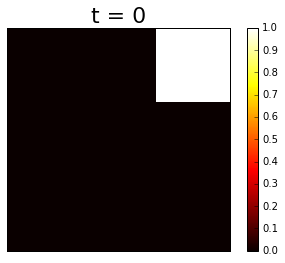

In [68]:
xvec = {1:3, 2:2, 3:1, 4:3, 5:2, 6:1, 7:3, 8:2, 9:1} 
yvec = {1:1, 2:1, 3:1, 4:2, 5:2, 6:2, 7:3, 8:3, 9:3} 


list_vec = []

run = 0
if run < 10: 
    run_str= '0' + str(run)
else: 
    run_str = str(run)
    
    
for n_runs in range(100000): 
    pos = 9
    for iter in range(run):
        pos = neighbor[pos][ random.randint(0, 3)]
    list_vec.append(pos)

x = [xvec[k] for k in list_vec]
y = [yvec[k] for k in list_vec]

plt.xticks([])
plt.yticks([])

'''create a Histogram'''
H, xedges, yedges = np.histogram2d(x, y, bins=(3, 3), 
           range=[[1,3],[1,3]], normed=True)
print H
H /= np.sum(H)
print H

'''plot Histogram'''

extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]
plt.imshow(H, extent=extent, interpolation='nearest', vmin=0.0, vmax=1.0)
plt.set_cmap('hot')
plt.colorbar()
plt.title('t = '+str(run),fontsize=22)
plt.savefig('3x3_pebble_run_'+run_str+'.png')
plt.show()

Multiple Histogram

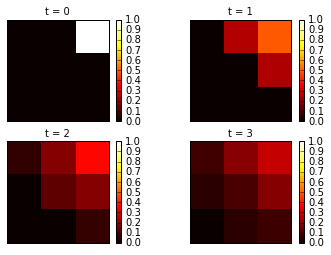

In [48]:

xvec = {1:3, 2:2, 3:1, 4:3, 5:2, 6:1, 7:3, 8:2, 9:1} 
yvec = {1:1, 2:1, 3:1, 4:2, 5:2, 6:2, 7:3, 8:3, 9:3} 


N_runs = 4
for run in range(N_runs):
    list_vec = []
    if run < 10:  run_str= '0'+str(run)
    else: run_str = str(run)
    for n_runs in range(100000): 
        pos = 9
        for iter in range(run):
            pos = neighbor[pos][ random.randint(0, 3)]
        list_vec.append(pos)

    x = [xvec[k] for k in list_vec]
    y = [yvec[k] for k in list_vec]
    
    plt.subplot(2,2,run+1)
    plt.xticks([])
    plt.yticks([])
    H, xedges, yedges = np.histogram2d(x, y, bins=(3, 3), 
               range=[[1,3],[1,3]], normed=True)
    #print H
    H /= np.sum(H)
    # print H
    extent = [yedges[0], yedges[-1], xedges[-1], xedges[0]]
    histo = plt.imshow(H, extent=extent, interpolation='nearest', vmin=0, vmax=1.00)
    histo.set_cmap('hot')
    plt.colorbar()
    plt.title('t = '+str(run),fontsize=10)
    #plt.savefig('marcob/3x3_pebble_run_'+run_str+'.png')
    #plt.close()
plt.show()

* Pebble movie

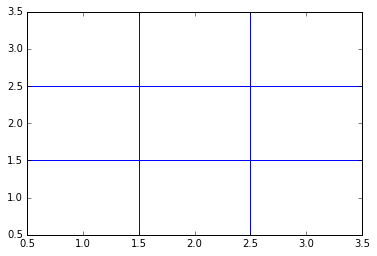

In [61]:
def grider():
    pylab.plot([0.5, 3.5], [1.5, 1.5], 'b')
    pylab.plot([0.5, 3.5], [2.5, 2.5], 'b')
    pylab.plot([1.5, 1.5], [0.5, 3.5], 'b')
    pylab.plot([2.5, 2.5], [0.5, 3.5], 'b')
    return
grider()

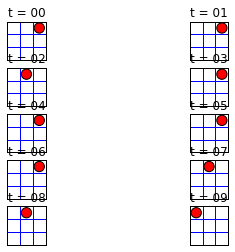

In [69]:

sigma = 0.4  # sigma and s_map are needed for the graphical output
s_map = [(1.0, 1.0), (2.0, 1.0), (3.0, 1.0), 
         (1.0, 2.0), (2.0, 2.0), (3.0, 2.0), 
         (1.0, 3.0), (2.0, 3.0), (3.0, 3.0)] 
neighbor_o =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
site = 8
N_runs = 10
for run in range(N_runs):
    if run < 10: number_string = '0'+str(run)
    else: number_string = str(run)
    # Begin of graphical output
    cir = pylab.Circle(s_map[site], radius=sigma, fc='r')
    pylab.subplot(5,2,run+1)
    pylab.gca().add_patch(cir)
    grider()
    pylab.title('t = '+ number_string)
    pylab.axis('scaled')
    pylab.axis([0.5, 3.5, 0.5, 3.5])
    pylab.xticks([])
    pylab.yticks([])
    #pylab.savefig('peeble_movie/pebble_basic_movie_'+number_string+'.png', transparent=False)
    #pylab.show()    
    #pylab.clf()
    # End of graphical output
    site = neighbor_o[site][ random.randint(0, 3)]
pylab.show()   

### Peeble-Dual

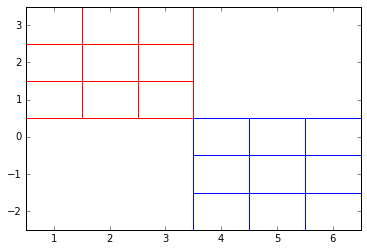

In [73]:
def double_grider():
        pylab.axis([0.5, 6.5, -2.5, 3.5])
        pylab.plot([0.5, 3.5], [0.5, 0.5], 'r')
        pylab.plot([0.5, 3.5], [1.5, 1.5], 'r')
        pylab.plot([0.5, 3.5], [2.5, 2.5], 'r')
        pylab.plot([1.5, 1.5], [0.5, 3.5], 'r')
        pylab.plot([2.5, 2.5], [0.5, 3.5], 'r')
        pylab.plot([3.5, 3.5], [0.5, 3.5], 'r')
        pylab.plot([0.5+offset, 3.5+offset], [1.5-offset, 1.5-offset], 'b')
        pylab.plot([0.5+offset, 3.5+offset], [2.5-offset, 2.5-offset], 'b')
        pylab.plot([0.5+offset, 3.5+offset], [3.5-offset, 3.5-offset], 'b')
        pylab.plot([0.5+offset, 0.5+offset], [0.5-offset, 3.5-offset], 'b')
        pylab.plot([1.5+offset, 1.5+offset], [0.5-offset, 3.5-offset], 'b')
        pylab.plot([2.5+offset, 2.5+offset], [0.5-offset, 3.5-offset], 'b')
        return
double_grider()

* Pebble transfer strategy

In [78]:
transfer = np.zeros((9, 9))
for k in range(9):
    for neigh in range(4): transfer[neighbor_o[k][neigh], k] += 0.25
position = np.zeros(9)
position[8] = 1.0
for t in range(10):
    print t,'  ',["%0.5f" % abs(i- 1.0 / 9.0) for i in position]
    position = np.dot(transfer, position)


0    ['0.11111', '0.11111', '0.11111', '0.11111', '0.11111', '0.11111', '0.11111', '0.11111', '0.88889']
1    ['0.11111', '0.11111', '0.11111', '0.11111', '0.11111', '0.13889', '0.11111', '0.13889', '0.38889']
2    ['0.11111', '0.11111', '0.04861', '0.11111', '0.01389', '0.07639', '0.04861', '0.07639', '0.26389']
3    ['0.11111', '0.06424', '0.03299', '0.06424', '0.01736', '0.07639', '0.03299', '0.07639', '0.17014']
4    ['0.08767', '0.05642', '0.01345', '0.05642', '0.00608', '0.04905', '0.01345', '0.04905', '0.12326']
5    ['0.07205', '0.03787', '0.00857', '0.03787', '0.00369', '0.04123', '0.00857', '0.04123', '0.08615']
6    ['0.05496', '0.03054', '0.00345', '0.03054', '0.00168', '0.02878', '0.00345', '0.02878', '0.06369']
7    ['0.04275', '0.02182', '0.00216', '0.02182', '0.00088', '0.02268', '0.00216', '0.02268', '0.04624']
8    ['0.03228', '0.01690', '0.00087', '0.01690', '0.00043', '0.01647', '0.00087', '0.01647', '0.03446']
9    ['0.02459', '0.01241', '0.00054', '0.01241', '0.00

* Pebble transfer Eigen

In [80]:
import numpy
 
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
transfer = numpy.zeros((18, 18))
for k in range(9):
    for neigh in range(4): 
        transfer[neighbor[k][neigh], k] += 0.25     # red pebble game
        transfer[neighbor[k][neigh]+9, k+9] += 0.25 # blue pebble game   
# small transition epsilon between red 2 and blue 6
epsilon = 0.04
transfer[6+9,2] = transfer[2,6+9] = epsilon
transfer[2,2] -= epsilon
transfer[6+9,6+9] -= epsilon
eigenvalues, eigenvectors = numpy.linalg.eig(transfer)
print eigenvalues
 
# you may print the eigenvectors by uncommenting the following four lines
#for iter in range(18):
#    print eigenvalues[iter]
#    for i in range(18):
#        print eigenvectors[i][iter]


[ -5.02430015e-01  -5.00000000e-01   1.00000000e+00   9.92451031e-01
   7.25649298e-01   5.00000000e-01   4.79023434e-01  -1.50050555e-02
   2.40311308e-01   7.50000000e-01   7.50000000e-01   1.52303605e-17
   7.50000000e-01  -1.04083409e-16   1.07326675e-17   2.50000000e-01
   2.50000000e-01   2.50000000e-01]


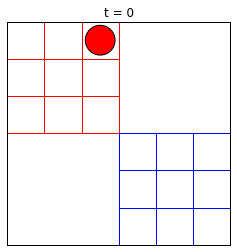

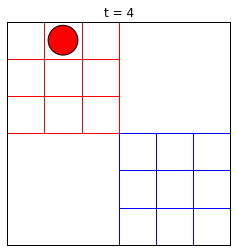

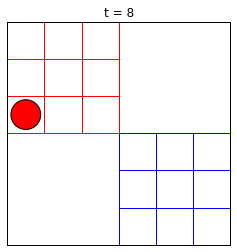

In [75]:
random.seed('1234')
sigma = 0.4
epsilon = 0.4  # probability to switch from red to blue pebble, and vice versa

pylab.figure()

s_map_red =  [(1.0, 1.0), (2.0, 1.0), (3.0, 1.0), 
              (1.0, 2.0), (2.0, 2.0), (3.0, 2.0), 
              (1.0, 3.0), (2.0, 3.0), (3.0, 3.0)] 
offset = 3.0
s_map_blue = [(x+offset,y-offset) for (x,y) in s_map_red]

color = 'red'  #chose 'red' or 'blue'
site = 8
tmax = 10



for iter in range(tmax):
    period = 4
    if (iter%period) == 0:
	# Begin of graphical output
        maxlength = len(str(tmax-1))
        number_string = str(iter).zfill(maxlength)
        if color == 'red':  cir = pylab.Circle(s_map_red[site],  radius=sigma, fc='r')
        if color == 'blue': cir = pylab.Circle(s_map_blue[site], radius=sigma, fc='b')
	pylab.figure()
        #pylab.subplot(2,2,iter)
        pylab.gca().add_patch(cir)
        double_grider()
        pylab.title('t = '+ number_string)
        pylab.axis('scaled')
        pylab.axis([0.5, 6.5, -2.5, 3.5])
        pylab.xticks([])
        pylab.yticks([])
        number_string_filename = str(iter/period).zfill(3)
        #pylab.savefig('peeble_dual/pebble_dual_movie_epsilon_'+number_string_filename+'.png', transparent=True)
        #pylab.clf()
        #pylab.close()
        pylab.show()
	# End of graphical output
    
    
    
    newsite = neighbor_o[site][ random.randint(0, 3)]
    newcolor = color
    if (color == 'red') and (site == 2) and (newsite == 2):
        if random.random() < epsilon:
            newcolor = 'blue'
            newsite = 6
            print "transition red->blue at time = ", iter
    if (color == 'blue') and (site == 6) and (newsite == 6):
        if random.random() < epsilon:
            newcolor = 'red'
            newsite = 2
            print "transition blue->red at time = ", iter
    site = newsite
    color = newcolor


* Pebble Dual Eigen

In [79]:
import numpy
 
neighbor =  [[1, 3, 0, 0], [2, 4, 0, 1], [2, 5, 1, 2],
             [4, 6, 3, 0], [5, 7, 3, 1], [5, 8, 4, 2],
             [7, 6, 6, 3], [8, 7, 6, 4], [8, 8, 7, 5]]
transfer = numpy.zeros((18, 18))
for k in range(9):
    for neigh in range(4): 
        transfer[neighbor[k][neigh], k] += 0.25     # red pebble game
        transfer[neighbor[k][neigh]+9, k+9] += 0.25 # blue pebble game   
# small transition epsilon between red 2 and blue 6
epsilon = 0.04
transfer[6+9,2] = transfer[2,6+9] = epsilon
transfer[2,2] -= epsilon
transfer[6+9,6+9] -= epsilon
eigenvalues, eigenvectors = numpy.linalg.eig(transfer)
print eigenvalues
 
# you may print the eigenvectors by uncommenting the following four lines
#for iter in range(18):
#    print eigenvalues[iter]
#    for i in range(18):
#        print eigenvectors[i][iter]


[ -5.02430015e-01  -5.00000000e-01   1.00000000e+00   9.92451031e-01
   7.25649298e-01   5.00000000e-01   4.79023434e-01  -1.50050555e-02
   2.40311308e-01   7.50000000e-01   7.50000000e-01   1.52303605e-17
   7.50000000e-01  -1.04083409e-16   1.07326675e-17   2.50000000e-01
   2.50000000e-01   2.50000000e-01]


* Pebble Recrrunt Movie

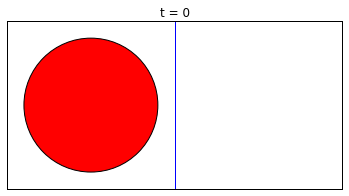

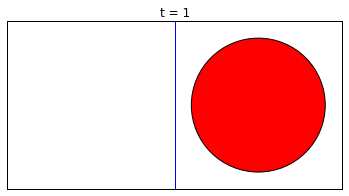

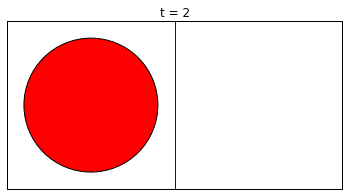

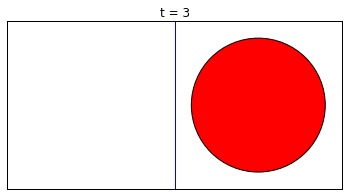

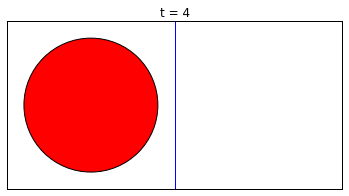

In [82]:
import math, random, pylab

sigma = 0.4
epsilon = 0.1
pylab.figure()
s_map = [(1.0, 1.0), (2.0, 1.0)] 
neighbor =  [[1], [0]]
pos = 0
tmax = 5
for iter in range(tmax):
    # Begin of the graphics output
    pylab.figure()
    number_string = str(iter).zfill(len(str(tmax)))
    cir = pylab.Circle(s_map[pos], radius=sigma, fc='r')
    pylab.gca().add_patch(cir)
    pylab.plot([1.5, 1.5], [0.5, 1.5], 'b')
    pylab.title('t = '+ number_string)
    pylab.axis('scaled')
    pylab.axis([0.5, 2.5, 0.5, 1.5])
    pylab.xticks([])
    pylab.yticks([])
    pylab.savefig('recurrent/2x1pebble_epsilon'+number_string+'.png', transparent=True)
    #pylab.close()
    pylab.show()
    # End of the graphics output
    newpos = neighbor[pos][0]
    if random.random() < epsilon:
        newpos = pos
    pos = newpos


In [83]:
import numpy

epsilon = 0.01
transfer = [[ epsilon, 1.0 - epsilon ],
            [ 1.0 - epsilon, epsilon ]]
eigenvalues, eigenvectors = numpy.linalg.eig(transfer)
print eigenvalues
 
# you may print the eigenvectors by uncommenting the following lines...
#for iter in range(2):
#    print eigenvalues[iter]
#    for i in range(2):
#       print eigenvectors[i][iter]


[ 1.   -0.98]
